In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
rcParams["font.size"] = 11.5
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['text.usetex'] = True
matplotlib.rc('text', usetex=True)
rcParams["text.latex.preamble"].join([r"\usepackage{dashbox}",r"\setmainfont{xcolor}",])
cmap=plt.get_cmap('viridis')
from astropy.timeseries import LombScargle
import astropy.units as u
from numpy import matrix
import pandas as pd
tt=9    
v=np.zeros((tt))
import warnings
warnings.filterwarnings("ignore")
import scipy as sc
col=['g', 'r', 'b', 'c', 'k', 'y', 'darkred']   
addres='./DWD8'
tarnam=str(2000073295)
T=float(0.25056)
from astropy.io import ascii

************************************************************
search_result:   SearchResult containing 1 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 55 2022 TESS-SPOC     600  2000073295      0.0
Length data:   2000073295 2620 [0.00000000e+00 6.94461873e-03 1.38892365e-02 ... 2.71389458e+01
 2.71458902e+01 2.71528345e+01] [-0.51793496 -0.51499831  0.33747    ... -0.17669178  0.1294918
  0.0538258 ] [0.31659438 0.31676199 0.31801042 ... 0.29722388 0.29769605 0.29783033] [0. 0. 0. ... 0. 0. 0.]
Intial numbers, accepted numbers:   2620 2620
************************************************************


<Figure size 640x480 with 0 Axes>

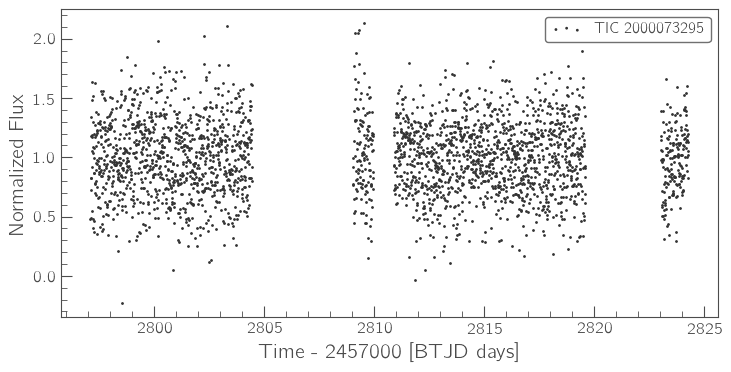

In [2]:
search_result = lk.search_lightcurve('TIC 2000073295',mission='Tess',author="TESS-SPOC")
lc_collection=search_result.download_all(flux_column='pdcsap_flux') ##download_all
lc=lc_collection.stitch().normalize().flatten(window_length=901,break_tolerance=50)#.stitch()
lc=lc.remove_nans()
#lc=lc.remove_outliers(sigma=3.0)
lcSSA= lc.copy()
plt.cla()
plt.clf()
lc.scatter()
fig=plt.gcf()
fig.savefig(addres+'/rawdata.jpg',dpi=200)

lc.to_csv(addres+'/target'+str(tarnam)+'.csv', overwrite=True)
df=pd.read_csv(addres+'/target'+str(tarnam)+'.csv')
n0=int(len(df['time']))
dat0=np.zeros((n0,4))
dat0[:,0], dat0[:,1], dat0[:,2], dat0[:,3]=df['time'], df['flux'], df['flux_err'], df['quality']
dat0[:,0]=dat0[:,0]-dat0[0,0]
dat0[:,1]=dat0[:,1]-1.0

nd=0
dat=np.zeros((n0,4))
for i in range(n0):  
    if(dat0[i,2]>0.0 and dat0[i,3]==0): 
        dat[nd,:]=dat0[i,:]
        nd+=1

print("************************************************************")
print("search_result:  ",  search_result)
#print("lc_collection: ",    lc_collection)
print("Length data:  ", tarnam, n0, dat0[:,0], dat0[:,1], dat0[:,2], dat0[:,3])
print("Intial numbers, accepted numbers:  ",  n0, nd)
print("************************************************************")

BLS period, t0, dur :  9.89245024448898 d 2804.3477967353897 0.2 d 0.25056 0.12528
************************************************************
[1.00000000e-06 1.00007104e-06 1.00014209e-06 ... 3.01766493e-04
 3.01766564e-04 3.01766635e-04] Hz 0.25056 0.12528 0.50112 0.75168
LS Type(T):  <class 'float'>
frequency:  2.2624298710979392e-06 Hz Hz
period (days):  5.115771419892572 10.231542839785144 15.347314259677717 20.463085679570288 25.57885709946286 30.694628519355433 35.810399939248
************************************************************
0.0 27.15283451975347


<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 848.5x400 with 0 Axes>

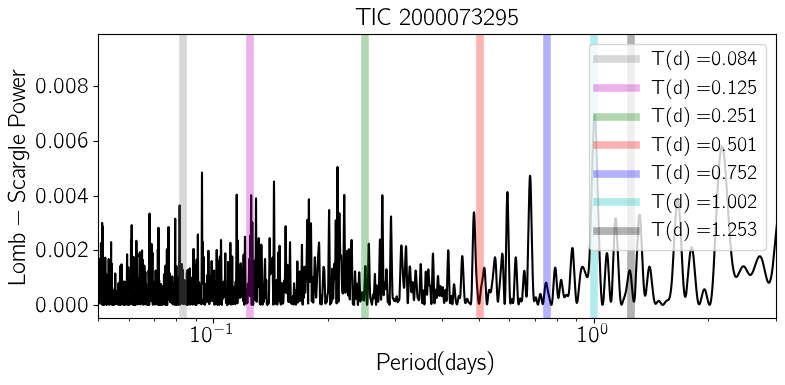

In [6]:
prange =np.linspace(T*1.4, T*50.0, 500)
lc['flux']=-lc['flux']
bls =lc.to_periodogram("bls", period=prange, frequency_factor=7000 , objective='snr')
lc['flux']=-lc['flux']
period =bls.period_at_max_power
t0 = bls.transit_time_at_max_power
dur =bls.duration_at_max_power


plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
bls.plot(lw=1.5, label="" )
plt.xscale('log')
plt.axvline(x =T/3.0,color='gray', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/3.,2)), alpha=0.3)
plt.axvline(x =T/2.0,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,2)), alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color =col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),2)),alpha=0.3)    
plt.xlim([prange[0], prange[len(prange)-1] ])    
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Depth}~\rm{SNR}$",   fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend()
plt.legend(prop={"size":14}, loc='best')
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/BLSa{0:d}.jpg".format(int(tarnam)),dpi=200)
print("BLS period, t0, dur : ", period, t0,  dur, T, T*0.5)
print("************************************************************")



LS = LombScargle(lc['time'], lc['flux'])
frequency,power = LS.autopower(samples_per_peak=6000, minimum_frequency=1e-6*u.Hz, maximum_frequency=3e-4*u.Hz)
best_frequency = frequency[np.argmax(power)]
periodl=float(1.0/best_frequency.value/(3600.0*24.0))
print (frequency, T, T*0.5, T*2.0, T*3)


plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
plt.plot(1.0/frequency/(3600.0*24.0), power, "k-", lw=1.5)
plt.axvline(x =T/3.,color='gray', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/3.,3)),alpha=0.3)
plt.axvline(x =T*0.5,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,3)),alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color=col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),3)),alpha=0.3)  
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.legend(prop={"size":14}, loc='best')
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Lomb}-\rm{Scargle}~\rm{Power}$",fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.xlim(0.05,3.)
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/LombSa{0:d}.jpg".format(int(tarnam)),dpi=200)

print("LS Type(T): ",   type(periodl))
print("frequency: ", best_frequency, best_frequency.unit)
print("period (days): ",    periodl  , periodl*2, periodl*3, periodl*4, periodl*5, periodl*6, periodl*7)
print("************************************************************")
print(np.min(dat[:nd,0]),   np.max(dat[:nd,0]))

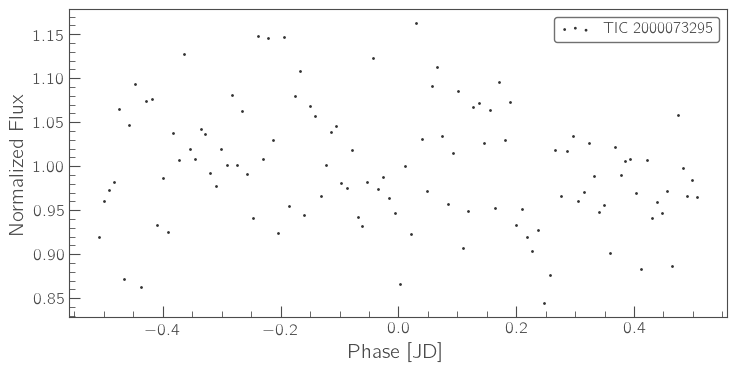

In [7]:
ax = lc.fold(period=5.115771419892572/5.).bin(binsize=23).scatter()
plt.show()

In [ ]:
plt.cla()
plt.clf()
plt.figure(figsize=(8, 6))
plt.errorbar(dat[:nd,0],dat[:nd,1],yerr=dat[:nd,2],fmt=".",markersize=5.5,color='green',ecolor='gray',elinewidth=0.1,capsize=0)
#plt.axhline(y=1.0, color='m', linestyle='--', lw=0.3)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17, rotation=0)
#plt.xlim([ 0.0, T])
fig=plt.gcf()
fig.savefig(addres+"/lightcurve1Period.jpg",dpi=200)
print ("Limit_1: ",   np.min(dat[:nd,0]),   np.max(dat[:nd,0]) )    
######################################################################################
for k in range(10):
    bins=np.arange(0.0, T, T/10.0)+ T*k
    nb=len(bins)    
    ybin=np.zeros((nb,2))
    for i in range(nd):
        if(dat[i,0]>=float(T*k) and dat[i,0]<float(T*(k+1)) ): 
            nk=-1
            if(dat[i,0]<=bins[0]):      nk=0
            elif(dat[i,0]>=bins[nb-1]): nk=nb-1
            else:
                for j in range(nb-1):
                    if(float((dat[i,0]-bins[j])*(dat[i,0]-bins[j+1]))<0.0 or dat[i,0]==bins[j]): nk=j; break     
            if(nk<0 or nk>int(nb-1)):
                print("Error: ",  nk, dat[i,0], bins);  input("Enter a number ")
            ybin[nk,0]+= dat[i,1]
            ybin[nk,1]+= 1.0
    for i in range(nb):
        if(ybin[i,1]>0.0): ybin[i,0]=ybin[i,0]/ybin[i,1] 
        else:              ybin[i,0]=14.0  
    plt.cla()
    plt.clf()
    plt.figure(figsize=(8, 6))
    plt.errorbar(dat[:nd,0],dat[:nd,1],yerr=dat[:nd,2],fmt=".",markersize=10.5,color='green',ecolor='lime',elinewidth=0.1,alpha=0.5)
    #plt.plot(bins, ybin[:,0], "ro", markersize=6.0)
    #plt.axhline(y=1.0, color='m', linestyle='--', lw=0.3)
    plt.xticks(fontsize=17, rotation=0)
    plt.yticks(fontsize=17, rotation=0)
    plt.xlim([ T*k,T*(k+1)])
    fig=plt.gcf()
    fig.savefig(addres+"/light{0:d}.jpg".format(k),dpi=200)
print("limit_2",  np.min(dat[:nd,0]),   np.max(dat[:nd,0]) )    

In [ ]:
Nd=nd#838
L=200
K=Nd-L+1
y=np.zeros((Nd))
y=dat[:Nd,1]
Tmax = sc.linalg.hankel(y[:L] , y[(L-1):]) #LxK
U, Sing, VT =np.linalg.svd(Tmax)
Rank  =np.sum(Sing>0)
Comp  =np.zeros((Rank,Nd))    
weight=np.zeros((Nd))  
Etrip =np.zeros((L,K,Rank))
Sume  =np.zeros((L,K))
perc  =np.zeros((Rank))

for i in range(Rank):
    Etrip[:,:,i]=Sing[i]*np.outer(U[:,i], VT[i,:])# LxK
    Sume +=Etrip[:,:,i]
    for j in range(Nd): 
        weight[j]=len(np.fliplr(Etrip[:,:,i]).diagonal(K-1-j))
        Comp[i,j]=np.mean(np.fliplr(Etrip[:,:,i]).diagonal(K-1-j))
    LS=LombScargle(lc['time'][:Nd], Comp[i,:].T )
    fr,pow = LS.autopower(minimum_frequency=1e-6*u.Hz, maximum_frequency=1e-4*u.Hz)
    bfr = fr[np.argmax(pow)]
    perc[i]=float(1.0/bfr.value/(3600.0*24.0))##days    
    
#print("period_componenets: ", perc)
#######################################################################
CorrM=np.zeros((Rank,Rank))
Siz=np.zeros((Rank))
ws=np.sum(weight)
for i in range(Rank):  
    Siz[i]=np.sqrt(np.sum(weight*Comp[i,:]*Comp[i,:])/ws) 

Sumc=np.zeros((Rank))
for i in range(Rank): 
    for j in range(Rank): 
        CorrM[i,j]=np.abs(np.sum(weight*Comp[i,:]*Comp[j,:])/(ws*Siz[i]*Siz[j])) 
        if(i!=j):
            Sumc[i]+=CorrM[i,j] 

if(np.any(np.abs(Sume-Tmax)>1e-5)or Rank!=L or np.any(weight<=0) or np.any(weight>(L+K)) or np.any(CorrM<-0.01) or 
    np.any(CorrM>1.01) or np.any(Sumc<-0.0001)): 
    print("Error Sum_Etriplets:\n",Sume,"\n")
    print("TMatrix: \n",Tmax,"\nSum-Tmatrix:\n",Sume-Tmax,"\n")   
    print("WcorrelationM:\n ",CorrM,"\n") 
    print(weight, Rank, L, K+L, Sumc)   
    input("Enter a nmber(Error) ") 




plt.cla()   
plt.clf()
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
plt.imshow(CorrM,cmap=cmap,interpolation='nearest',aspect='equal', origin='lower')
plt.clim()
minn=np.min(CorrM)
maxx=np.max(CorrM)
step=float((maxx-minn)/(tt-1.0));
for m in range(tt):
    v[m]=round(float(minn+m*step),1)
cbar=plt.colorbar(orientation='horizontal',shrink=0.85,pad=0.1,ticks=v)
cbar.ax.tick_params(labelsize=17)
plt.clim(v[0]-0.005*step,v[tt-1]+0.005*step)
plt.xticks(fontsize=19, rotation=0)
plt.yticks(fontsize=19, rotation=0)
plt.xlim(0.0,Rank)
plt.ylim(0.0,Rank)
ax.set_aspect('equal',adjustable='box')
plt.xlabel(r"$\rm{Principle}~\rm{Comonent}$",fontsize=20,labelpad=0.05)
plt.ylabel(r"$\rm{Principle}~\rm{Comonent}$",fontsize=20,labelpad=0.05)
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/WCorrelationMatrix.jpg", dpi=200)         
#######################################################################
Comps =np.zeros(( Nd))             
Etrips=np.zeros((L,K)) 
nn=np.argsort(Sumc)
numa=0.0
for i in range(50):
    #if( abs(perc[i]%T)<abs(T) ):
    numa+=1.0
    #nn[i]=i
    print("Accepted componenet: ",i, Sing[i],  Sumc[i],  perc[i],  T,  nn[i], i)
    Etrips+= Etrip[:,:,int(nn[i])]

for j in range(Nd): 
    Comps[j]=np.mean(np.fliplr(Etrips).diagonal(K-1-j))    
#print(Comps, len(Comps)  )
ascii.write(np.stack((dat[:Nd,0],Comps),axis=1), addres+'/targetSSA'+str(tarnam)+'.txt',overwrite=True) 
print("limit_3",  np.min(dat[:nd,0]),   np.max(dat[:nd,0]) )    
#######################################################################
col=['k', 'r', 'b', 'c', 'm']   
plt.cla()
plt.clf()
plt.figure(figsize=(8, 6))
plt.plot(dat[:Nd,0],dat[:Nd,1],'g-', lw=1.0, alpha=0.8)#yerr=dat[:Nd,2],fmt=".",markersize=1.5,ecolor='gray',elinewidth=0.01,capsize=0
for i in range(5):
    plt.plot(dat[:Nd,0], Comp[i,:], color=col[int(i%5)], linestyle='-', lw=1.0)
#plt.plot(dat[:Nd,0], Comps, color='m', linestyle='-', lw=1.2, label=r"${Comulative}~\rm{Components}$", alpha=0.5)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17, rotation=0)
#plt.xlim([0.0,25.0])
#plt.ylim([0.85, 1.15])
plt.xlabel(r"$\rm{time}(\rm{days})$", fontsize=18)
plt.ylabel(r"$\rm{Normalized}~\rm{Flux}$", fontsize=18)
plt.legend()
plt.legend(prop={"size":16.0}, loc='best')
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/Cmponents.jpg",dpi=200)
print (dat[:Nd,0])
print("limit_4",  np.min(dat[:nd,0]),   np.max(dat[:nd,0]) )    

In [ ]:
nT=1.0
T0=T*nT#0.7922050442719225*1.0
datb=np.zeros((Nd))
for i in range(Nd):
    datb[i]=dat[i,0]
    while(datb[i]>=T0): 
        datb[i]=datb[i]-T0

bins=np.arange(0.0,T0, T0/20.)
dbin=bins[1]-bins[0]
nb=len(bins)
ybin=np.zeros((nb,2))

for i in range(Nd): 
    nk=-1
    if(datb[i]<=bins[0]):      nk=0
    elif(datb[i]>=bins[nb-1]): nk=nb-1
    else:
        for j in range(nb-1):
            if(float((datb[i]-bins[j])*(datb[i]-bins[j+1]))<0.0 or datb[i]==bins[j]): 
                nk=j; 
                break     
    if(nk<0 or nk>int(nb-1)):
        print("Error: ",  nk, datb[i], bins);  input("Enter a number ")
    ybin[nk,0]+=Comps[i]
    ybin[nk,1]+=1.0
for i in range(nb): 
    if(ybin[i,1]>0.0): ybin[i,0]=ybin[i,0]/ybin[i,1] 
    else:              ybin[i,0]=0.0  

plt.cla()
plt.clf()
plt.figure(figsize=(8, 6))
plt.errorbar(datb/(T0/nT),Comps+1.0,yerr=dat[:Nd,2],fmt=".",markersize=4.2,color='green',ecolor='gray',elinewidth=0.0,capsize=0,alpha=0.4)
plt.plot(bins/(T0/nT)+dbin*0.5/T0, ybin[:,0]+1.0, "ro", markersize=7.0)
#plt.plot(bins, Comps, "ko", markersize=2.0)
plt.axhline(y=0.0+1.0, color='b', linestyle='--', lw=1.3)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17, rotation=0)
#plt.text(0.021,1.3, r"$\rm{TIC}~$"+str(tarnam), fontsize=18)
plt.ylabel(r"$\rm{Normalized}~\rm{Flux}$",fontsize=18)
plt.xlabel(r"$\rm{time}/\rm{T}$", fontsize=18)
plt.xlim([0.0,nT])
plt.ylim([1.0-0.04,1.0+0.04])
fig=plt.gcf()
fig.savefig(addres+"/lightfoldA{0:d}.jpg".format(int(tarnam)),dpi=200)

In [ ]:
lcSSA['flux'][:]=-Comps
bls = lcSSA.to_periodogram("bls", period=prange, frequency_factor=10000 , objective='snr')#frequency_factor=2000 
lcSSA['flux'][:]=Comps
period =bls.period_at_max_power
t0 = bls.transit_time_at_max_power
dur =bls.duration_at_max_power

plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
bls.plot(lw=1.5, label="" )
plt.xscale('log')
plt.axvline(x =T/2.0,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,2)), alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color =col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),2)),alpha=0.3)    
plt.xlim([prange[0], prange[len(prange)-1] ])    
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Depth}~\rm{SNR}$",   fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend()
plt.legend(prop={"size":14}, loc='best')
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/BLSb{0:d}.jpg".format(int(tarnam)),dpi=200)
print("BLS period, t0, dur : ", period, t0,  dur)
print("************************************************************")

LS = LombScargle(lcSSA['time'], lcSSA['flux'])
frequency,power = LS.autopower(samples_per_peak=6000, minimum_frequency=1e-6*u.Hz, maximum_frequency=1e-4*u.Hz)
best_frequency = frequency[np.argmax(power)]
periodl=1.0/best_frequency.value/(3600.0*24.0)

plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
plt.plot(1.0/frequency/(3600.0*24.0), power, "k-", lw=1.5)
plt.axvline(x =T/3.0,color='green', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/3.,2)),alpha=0.3)
plt.axvline(x =T*0.5,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,2)),alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color=col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),2)),alpha=0.3)  
plt.xscale('log')
plt.legend()
plt.legend(prop={"size":14}, loc='best')
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Lomb}-\rm{Scargle}~\rm{Power}$",fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.xlim(0.1, 3.0)
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/LombSb{0:d}.jpg".format(int(tarnam)),dpi=200)

print("BLS:  period, t0, dur (After SSA): ",   period,    t0,   dur )
print("*************************************************************")
print("Lomb-Scargel frequency: ", best_frequency.value, best_frequency.unit)
print("period (days): ",    periodl  , periodl*2, periodl*3, periodl*4, periodl*5, periodl*6, periodl*7)
print("************************************************************")

In [ ]:
plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
ax = lcSSA.fold(period=T).bin(binsize=17).scatter()
#plt.plot(1.0/frequency/(3600.0*24.0), power, "k-", lw=1.5)
#plt.axvline(x =T*0.5,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,2)),alpha=0.3)
#for i in range(5):
#    plt.axvline(x=T*(i+1),color=col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),2)),alpha=0.3)  
#plt.xscale('log')
#plt.legend()
#plt.legend(prop={"size":14}, loc='best')
#plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
#plt.ylabel(r"$\rm{Lomb}-\rm{Scargle}~\rm{Power}$",fontsize=17)
#plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/Folded{0:d}.jpg".format(int(tarnam)),dpi=200)  